In [1]:
import cv2 as cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from art_utils import convert_color, mean_RGB, mean_HSV, lumnosity, edges, dark_ratio, quadrant_avg, entropy_quadrant, image_info

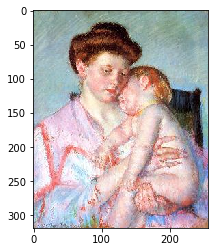

In [2]:
img_fp = "/Users/juliecorfman/ArtClassifier/train/13634.jpg"
#img_fp = "/Users/juliecorfman/ArtClassifier/train/79269.jpg"
img = cv2.imread(img_fp)
plt.imshow(convert_color(img))

<h2> 1. Mean values of the histogram intervals for RGB (24 features) </h2>

The normalized count is the count in the class divided by the number of observations times the class width. For this normalization, the area (or integral) under the histogram is equal to one. 

$\mu_{k}^{color}={\sum_{i=k\cdot l}^{(k+1)\cdot l}H(i)\over l\cdot H_{max}} \eqno{\hbox{(1)}}$

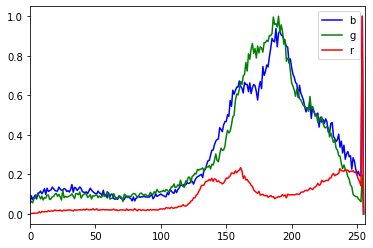

[1. 1. 1.]
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']
Blue [0.111, 0.112, 0.082, 0.125, 0.392, 0.721, 0.638, 0.35]
Green [0.085, 0.092, 0.093, 0.144, 0.332, 0.835, 0.624, 0.249]
Red [0.013, 0.021, 0.02, 0.04, 0.17, 0.125, 0.114, 0.216]


In [3]:
n = 8
mean_values, maxes, key = mean_RGB(img, n, True)

print(maxes)
print(key)
print("Blue", [round(x,3) for x in mean_values[0:n]])
print("Green", [round(x,3) for x in mean_values[n:n*2]])
print("Red", [round(x,3) for x in mean_values[n*2:n*3]]) 

<h2> 2. Mean values of the histograms intervals for HSV (24 features) & Local Maxima (3 features) </h2>

In your programs, color is known by RGB numbers. Another way to make color is with the HSV method. HSV means hue, saturation, and value. Sounds complicated but maybe there’s a way to think about that’s simple.

The first part, hue, is the color. A hue number of 0 means red and a hue number of 255 means violet. All of the other colors are in between those numbers.

The next number, saturation, is the amount of white light mixed in with hue. If this number is 0, then the color of hue is all washed away and you get some shade of grey or maybe just white. But, when you set it to 255, you have the full amount of the hue color.

The last number, value is how dark or light the color will be. Using 0 makes every color go to black and using 255 makes every color go to white. Some number in between is your color at some amount of darkness. Of course, 128 is average darkness and you will clearly see your color with value set to that.

<a href="https://makecode.adafruit.com/reference/light/hsv#:~:text=HSV%20means%20hue%2C%20saturation%2C%20and,are%20in%20between%20those%20numbers">source</a>

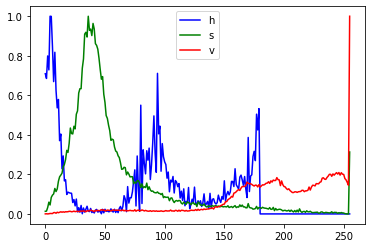

['H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6'
 'S7' 'S8' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8']
Hue [0.359, 0.017, 0.212, 0.147, 0.086, 0.148, 0.0, 0.0]
Saturation [0.284, 0.643, 0.158, 0.067, 0.04, 0.032, 0.016, 0.015]
Value [0.009, 0.017, 0.016, 0.016, 0.045, 0.145, 0.131, 0.205]
Number of Local Maxima per channel [3, 1, 1]


In [4]:
n = 8
mean_values, key, local_maxima = mean_HSV(img, n, True)

print(key)
print("Hue", [round(x,3) for x in mean_values[0:n]])
print("Saturation", [round(x,3) for x in mean_values[n:n*2]])
print("Value", [round(x,3) for x in mean_values[n*2:n*3]]) 
print("Number of Local Maxima per channel", local_maxima)

<h2> 3. Luminance (4 features) </h2>

${\displaystyle Y=0.2126*R_{lin}+0.7152*G_{lin}+0.0722*B_{lin}}$

per quadrant (on scale of 100%)

In [5]:
mean_lums = lumnosity(img)
mean_lums

array([0.58257272, 0.62364121, 0.79718014, 0.67864016])

<h2> 4. Edge Detection with Canny (3 features)</h2>

Ratio of number of pixels that are "edge" pixels

[0.09542761 0.02249461 0.13422071]


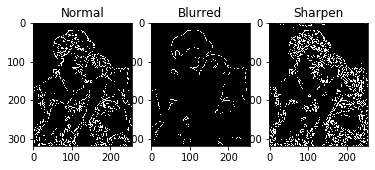

In [6]:
edge_ratios = edges(img, show=True)
print(edge_ratios)

<h2> 5. Ratio of Dark Pixels </h2>

Ratio of number of pixels that are "dark" pixes <64 on RGB scale

In [7]:
dark_pixels = dark_ratio(img)
print(dark_pixels)

0.0724391000522466


<h2> 6. Entropy (4 features)</h2>

https://scikit-image.org/docs/dev/auto_examples/filters/plot_entropy.html?highlight=texture

Entropy 

[4.83566731 4.80767972 5.16317425 5.27660331]


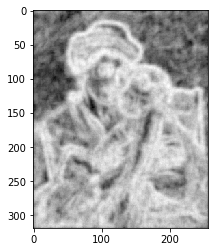

In [8]:
entropies = entropy_quadrant(img, show=True)
print(entropies)

<h2> 7. Symmetry TBD </h2>

Ratio of number of pixels that are "edge" pixels

https://towardsdatascience.com/image-feature-extraction-traditional-and-deep-learning-techniques-ccc059195d04

<h2> 8. SIFT TBD </h2>

https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

<h2> 9. Local Binary Classification TBD </h2> 

<h1> Processing One Image </h1>

#### feature labels in features.txt

In [29]:
%%timeit
## old_edge(ratio = 1.43s)
image_info(cv2.imread(img_fp))

380 ms ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%%timeit
## old_edge(ratio = 1.43s)
image_info_3(cv2.imread(img_fp))

403 ms ± 8.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
image_info(img)

310 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
mean_values, key, local_maxima = mean_HSV(img, n, False)

45 ms ± 5.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
mean_values, maxes, key = mean_RGB(img, n, False)

38.3 ms ± 5.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
mean_lums = lumnosity(img)

918 µs ± 127 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit
edge_ratios = edges(img, show=False)

68.5 ms ± 6.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%%timeit
dark_pixels = dark_ratio(img)

70.7 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%%timeit
entropy_quadrant(img, show=False)

119 ms ± 6.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
image_info_2(img, edge=True)

In [ ]:
%%timeit
image_info_2(img, edge=False)

In [ ]:
def image_info_2(img=np.array([]),show=False, img_fp="",edge=True):
    if len(img) == 0:
        img = cv.imread(img_fp)
    
    features = []
    keys = []
    n = 8
    mean_values_rgb, maxes, key_rgb = mean_RGB(img, n, show)
                    
    mean_values_hsv, key_hsv, local_maxima_hsv = mean_HSV(img, n, show)
                    
    mean_lums = lumnosity(img)
    if edge:
        edge_ratios = edges(img, show)
    else:
        edge_ratios = np.array([])
                    
    dark_pixels = dark_ratio(img)
                    
    entropies = entropy_quadrant(img, show)
    
    return np.append([mean_values_rgb] ,[mean_values_hsv,local_maxima_hsv,mean_lums,edge_ratios,dark_pixels,entropies])

In [23]:
def edges(img, show=False, x=True,y=True,z=True):
    edges = []
    
    if show:
        plt.subplot(1,3,1)
        plt.title('Normal')
        
    if x:
        n = edge_ratio_2(img, show)
    else:
        n=0
    
    if show:
        plt.subplot(1,3,2)
        plt.title('Blurred')
    if y:
        blur = cv2.GaussianBlur(img,(5,5),0)
        b  = edge_ratio_2(blur, show)
    else: 
        b = 0
    
    unsharp_masking =(-1/256) * np.array(
    [[1, 4, 6, 4, 1],
    [4,16,-24,16,4],
    [6,24,-476,24,6],
    [4,16,-24,16,4],
     [1, 4, 6, 4, 1]])
    
    if show:
        plt.subplot(1,3,3)
        plt.title('Sharpen')
        
    if z:
        sharpen = cv2.filter2D(img, -1, unsharp_masking)
        s = edge_ratio_2(sharpen, show)
    else:
        s = 0
    
    return np.array([n,b,s])

In [ ]:
from art_utils import edge_ratio

In [ ]:
%%timeit
edges(img)

In [ ]:
%%timeit
edges(img, x=True,y=False,z=False)

In [ ]:
%%timeit
edges(img, x=False,y=True,z=False)

In [ ]:
%%timeit
edges(img, x=False,y=False,z=True)

In [ ]:
%%timeit
edge_ratio_2(img)

In [27]:
def edge_ratio_2(img, show=False):
    edges = cv2.Canny(img,150,300)
#     if show:
#         plt.imshow(convert_color(edges))
    prod = (edges.shape[0] * edges.shape[1])
    num_edges = sum(np.where(edges.reshape(1, edges.shape[0] * edges.shape[1])[0] > 0, 1, 0))
    
    ratio_edges = num_edges / prod
    return ratio_edges, edges 

n, e2 = edge_ratio_2(img)

In [24]:
##### process one img
def image_info_3(img=np.array([]),show=False, img_fp=""):
    if len(img) == 0:
        img = cv.imread(img_fp)
    
    features = []
    keys = []
    n = 8
    mean_values_rgb, maxes, key_rgb = mean_RGB(img, n, show)
    
    features.extend(mean_values_rgb)
    keys.extend(key_rgb)
                    
    mean_values_hsv, key_hsv, local_maxima_hsv = mean_HSV(img, n, show)
    features.extend(mean_values_hsv)
    keys.extend(key_hsv)
    
    features.extend(local_maxima_hsv)
    keys.extend(['H_MX','S_MX','V_MX'])
                    
    mean_lums = list(lumnosity(img))
    features.extend(mean_lums)
    keys.extend(['L1', 'L2', 'L3', 'L4'])
    
    edge_ratios = list(edges(img, show))
    features.extend(edge_ratios)
    keys.extend(['ED1', 'ED2', 'ED3'])
    
                    
    dark_pixels = dark_ratio(img)
    features.append(dark_pixels)
    keys.append('DARKRATIO')
                    
    entropies = list(entropy_quadrant(img, show))
    features.extend(entropies)
    keys.extend(['ETR1', 'ETR2', 'ETR3', 'ETR4'])
    
    #return pd.Series({k:v for k,v in zip(keys, features)})
    return np.array(features)